In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')


In [3]:
# Exploring our data
print(df.head(10))
print(df.info())
print(df.describe())
print(df.isnull().sum())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
9      10  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

In [4]:
#data cleaning and feature engineering
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Ship Delay'] = (df['Ship Date'] - df['Order Date']).dt.days



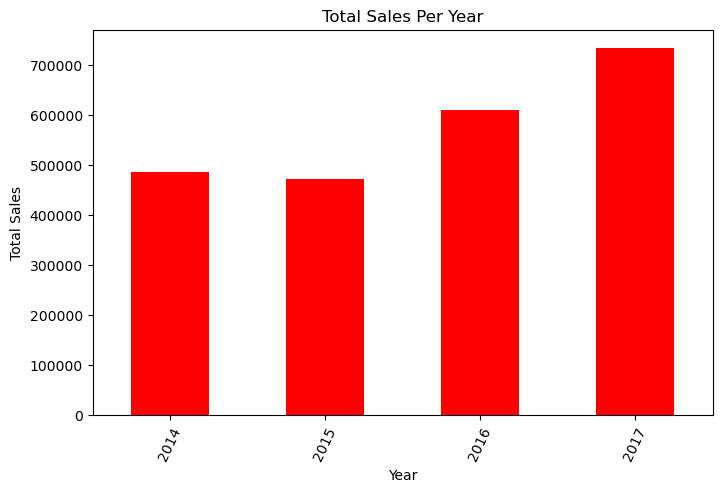

In [8]:
#visual analysis

# Sales Over Time (Yearly)
sales_by_year = df.groupby('Order Year')['Sales'].sum()
plt.figure(figsize=(8,5))
sales_by_year.plot(kind='bar', color='red')
plt.title("Total Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=65)
plt.show()



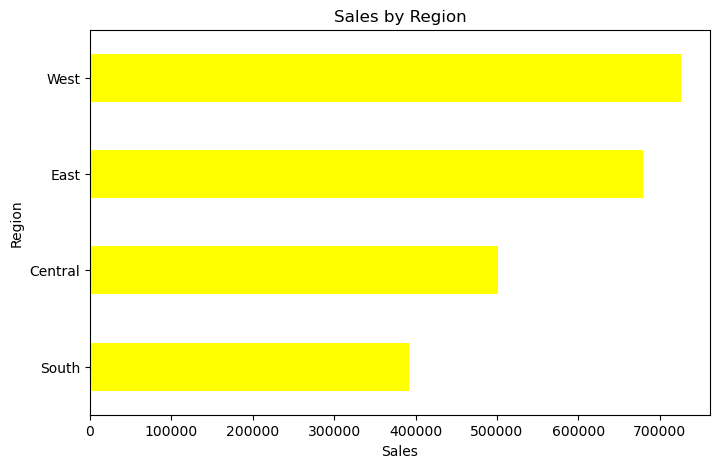

In [11]:

#Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
plt.figure(figsize=(8,5))
region_sales.plot(kind='barh', color='yellow')
plt.title("Sales by Region")
plt.xlabel("Sales")
plt.show()



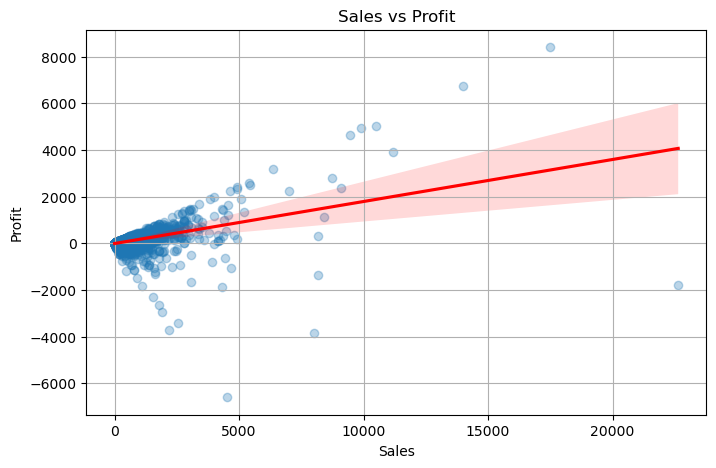

In [6]:
#Sales vs Profit Scatter Plot (with Regression Line)
plt.figure(figsize=(8,5))
sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


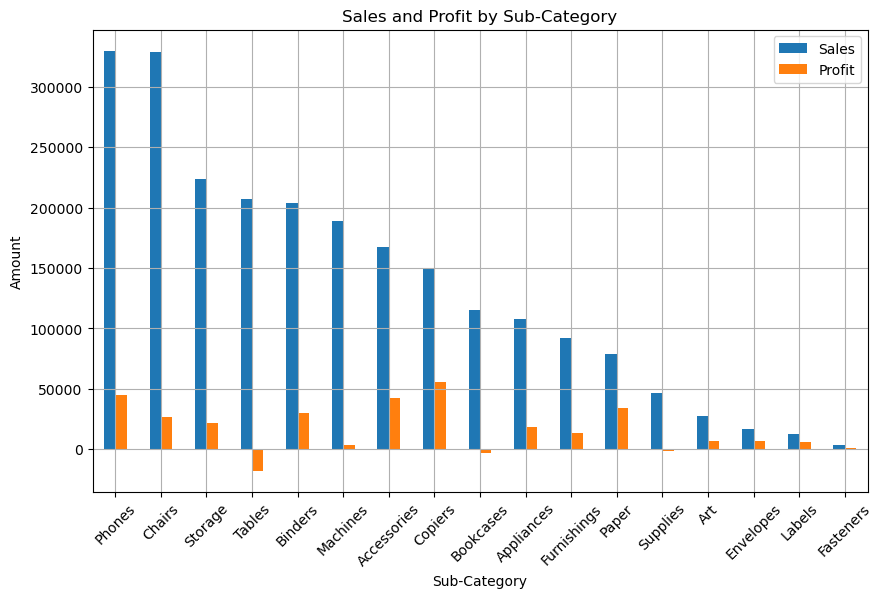

In [7]:
#Top Sub-Category Sales and Profit Combined Barplot
subcat_sales = df.groupby('Sub-Category')['Sales'].sum()
subcat_profit = df.groupby('Sub-Category')['Profit'].sum()
subcat_df = pd.DataFrame({'Sales': subcat_sales, 'Profit': subcat_profit})
subcat_df.sort_values('Sales', ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Sales and Profit by Sub-Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\Sai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


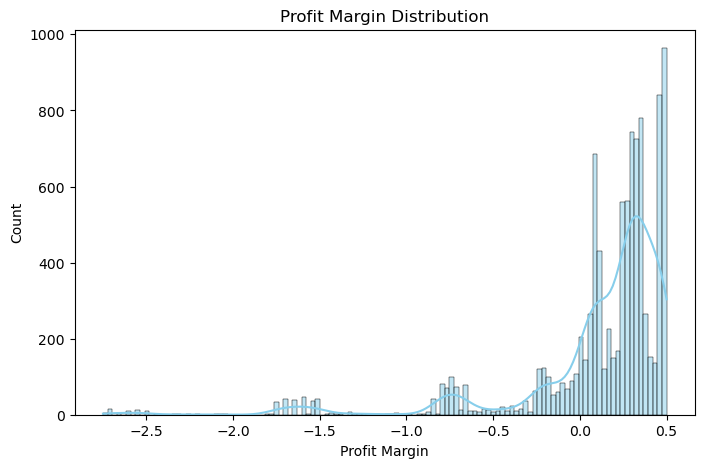

In [8]:
#Profit Margin Distribution
df['Profit Margin'] = df['Profit'] / df['Sales']
plt.figure(figsize=(8,5))
sns.histplot(df['Profit Margin'], kde=True, color='skyblue')
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.show()


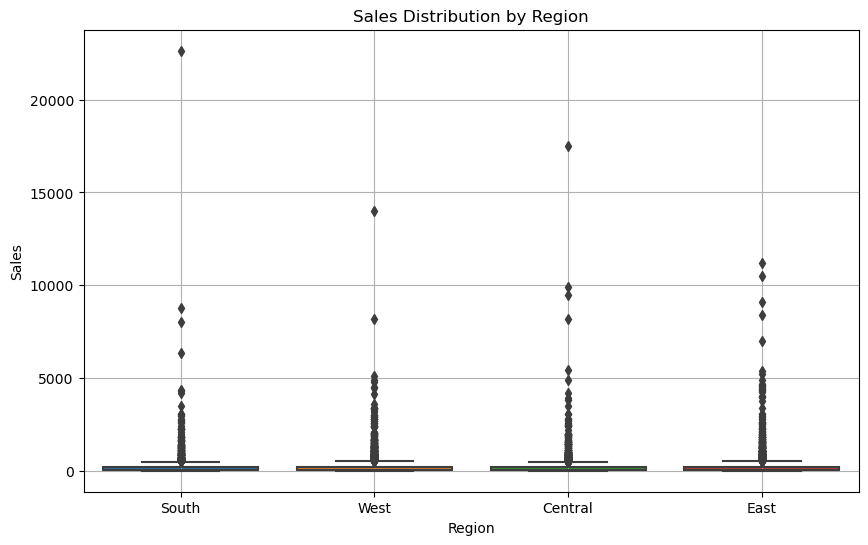

In [9]:
#-Sales Distribution Boxplot Across Regions
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title("Sales Distribution by Region")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


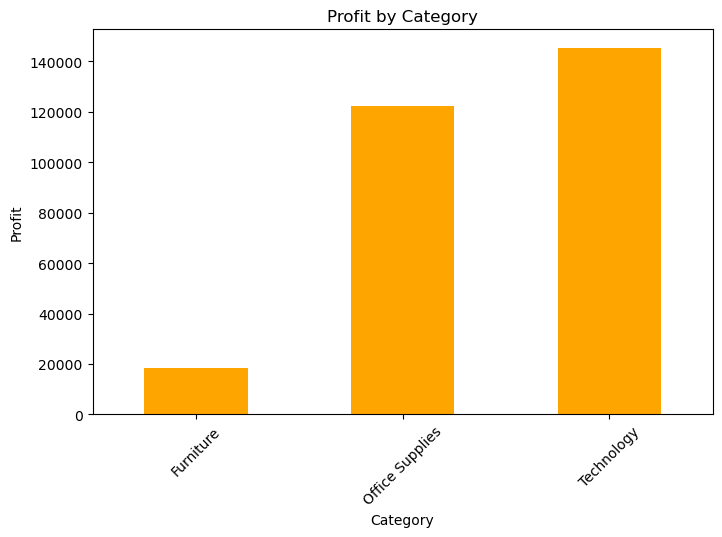

In [43]:

#  Category-wise Profit
category_profit = df.groupby('Category')['Profit'].sum()
plt.figure(figsize=(8,5))
category_profit.plot(kind='bar', color='orange')
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()



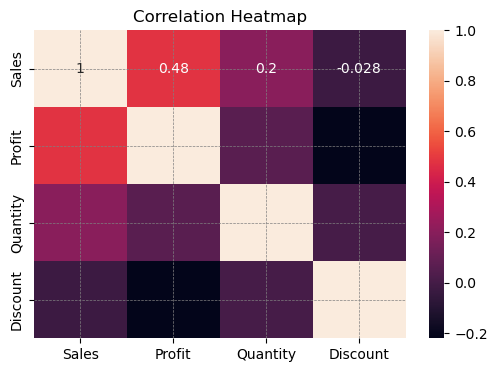

In [35]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Quantity', 'Discount']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


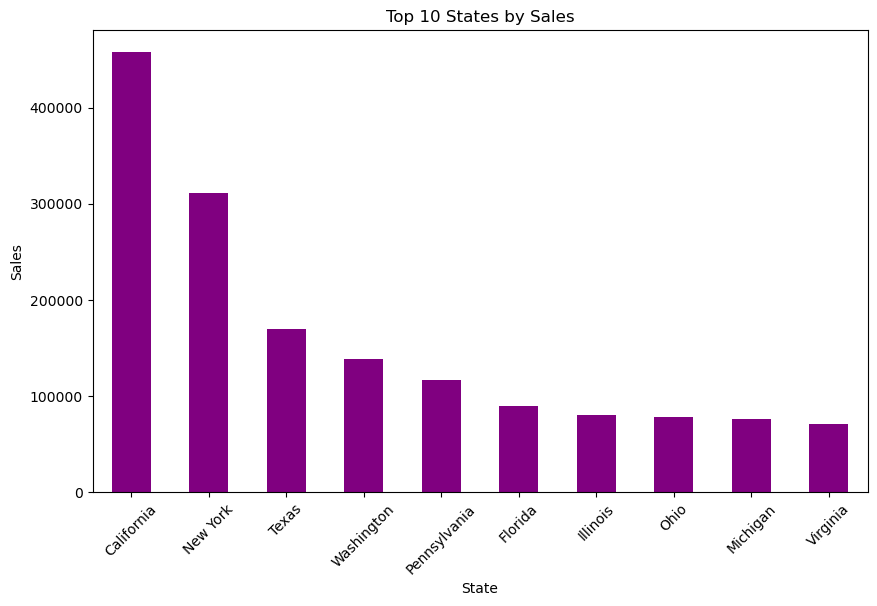

In [38]:
#  Top 10 States by Sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
state_sales.plot(kind='bar', color='purple')
plt.title("Top 10 States by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


In [15]:
#conclusion
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Total Orders:", len(df))

Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Total Orders: 9994


In [44]:
#Business questions
#What is the average order value?
average_order_value = df['Sales'].mean()
print("Average Order Value:", average_order_value)


Average Order Value: 229.85800083049833


In [45]:
#Which product gives the highest total sales?
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:\n", product_sales)


Top 5 Products by Sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [46]:
#Which sub-category gives the highest profit?
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)
print("Top 5 Sub-Categories by Profit:\n", subcategory_profit)


Top 5 Sub-Categories by Profit:
 Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


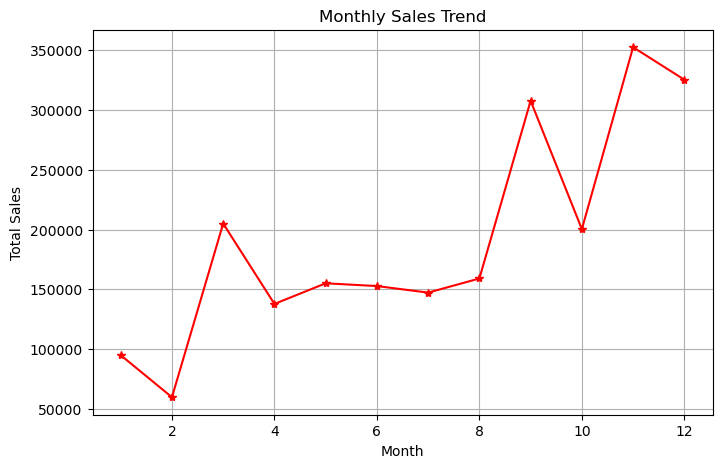

In [51]:
#Monthly sale trend
monthly_sales = df.groupby('Order Month')['Sales'].sum()
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='line', marker='*', color='red')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [48]:
#Average shipping delay
avg_ship_delay = df['Ship Delay'].mean()
print("Average Shipping Delay (Days):", avg_ship_delay)


Average Shipping Delay (Days): 3.958174904942966


In [49]:
# Relationship between sales & profit (simple correlation)
correlation = df['Sales'].corr(df['Profit'])
print("Correlation between Sales & Profit:", correlation)


Correlation between Sales & Profit: 0.4790643497377058
